# Supervised learning from data: Regression

### Learning from data

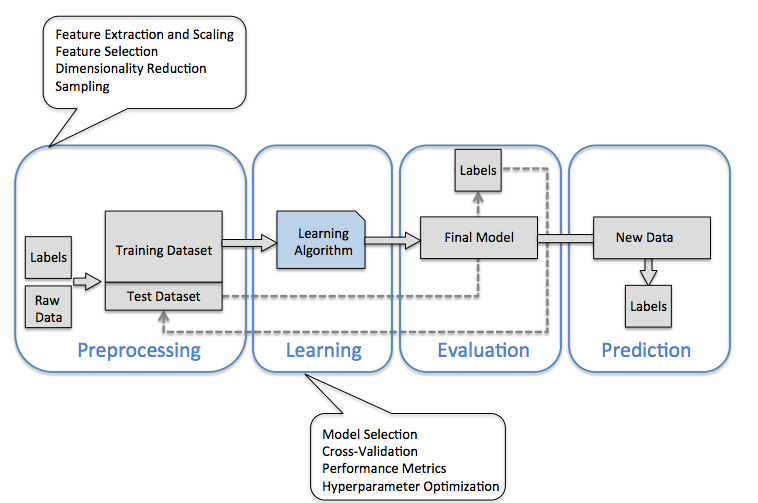

### Linear regression for two dimensional data

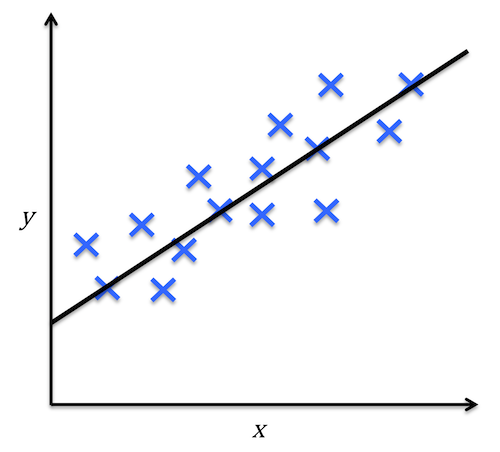

## Learning diabetes change with [scikit-learn](http://scikit-learn.org)

### Loading data

In [86]:
from sklearn import datasets


In [87]:
patients = datasets.load_diabetes()
type(patients)

sklearn.utils.Bunch

In [88]:
dir(patients)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'target',
 'target_filename']

### Preprocessing. 

In [89]:
 print(patients['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [119]:
print(patients['data'])
print(patients['target'])

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [91]:
print(patients.data[1,:])

[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]


In [92]:
print(patients.target[1])

75.0


In [93]:
import pandas as pd
patiens_p = pd.DataFrame(patients.data, columns=[patients.feature_names])
patiens_p.head()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Exploratory analysis

In [94]:
patiens_p.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


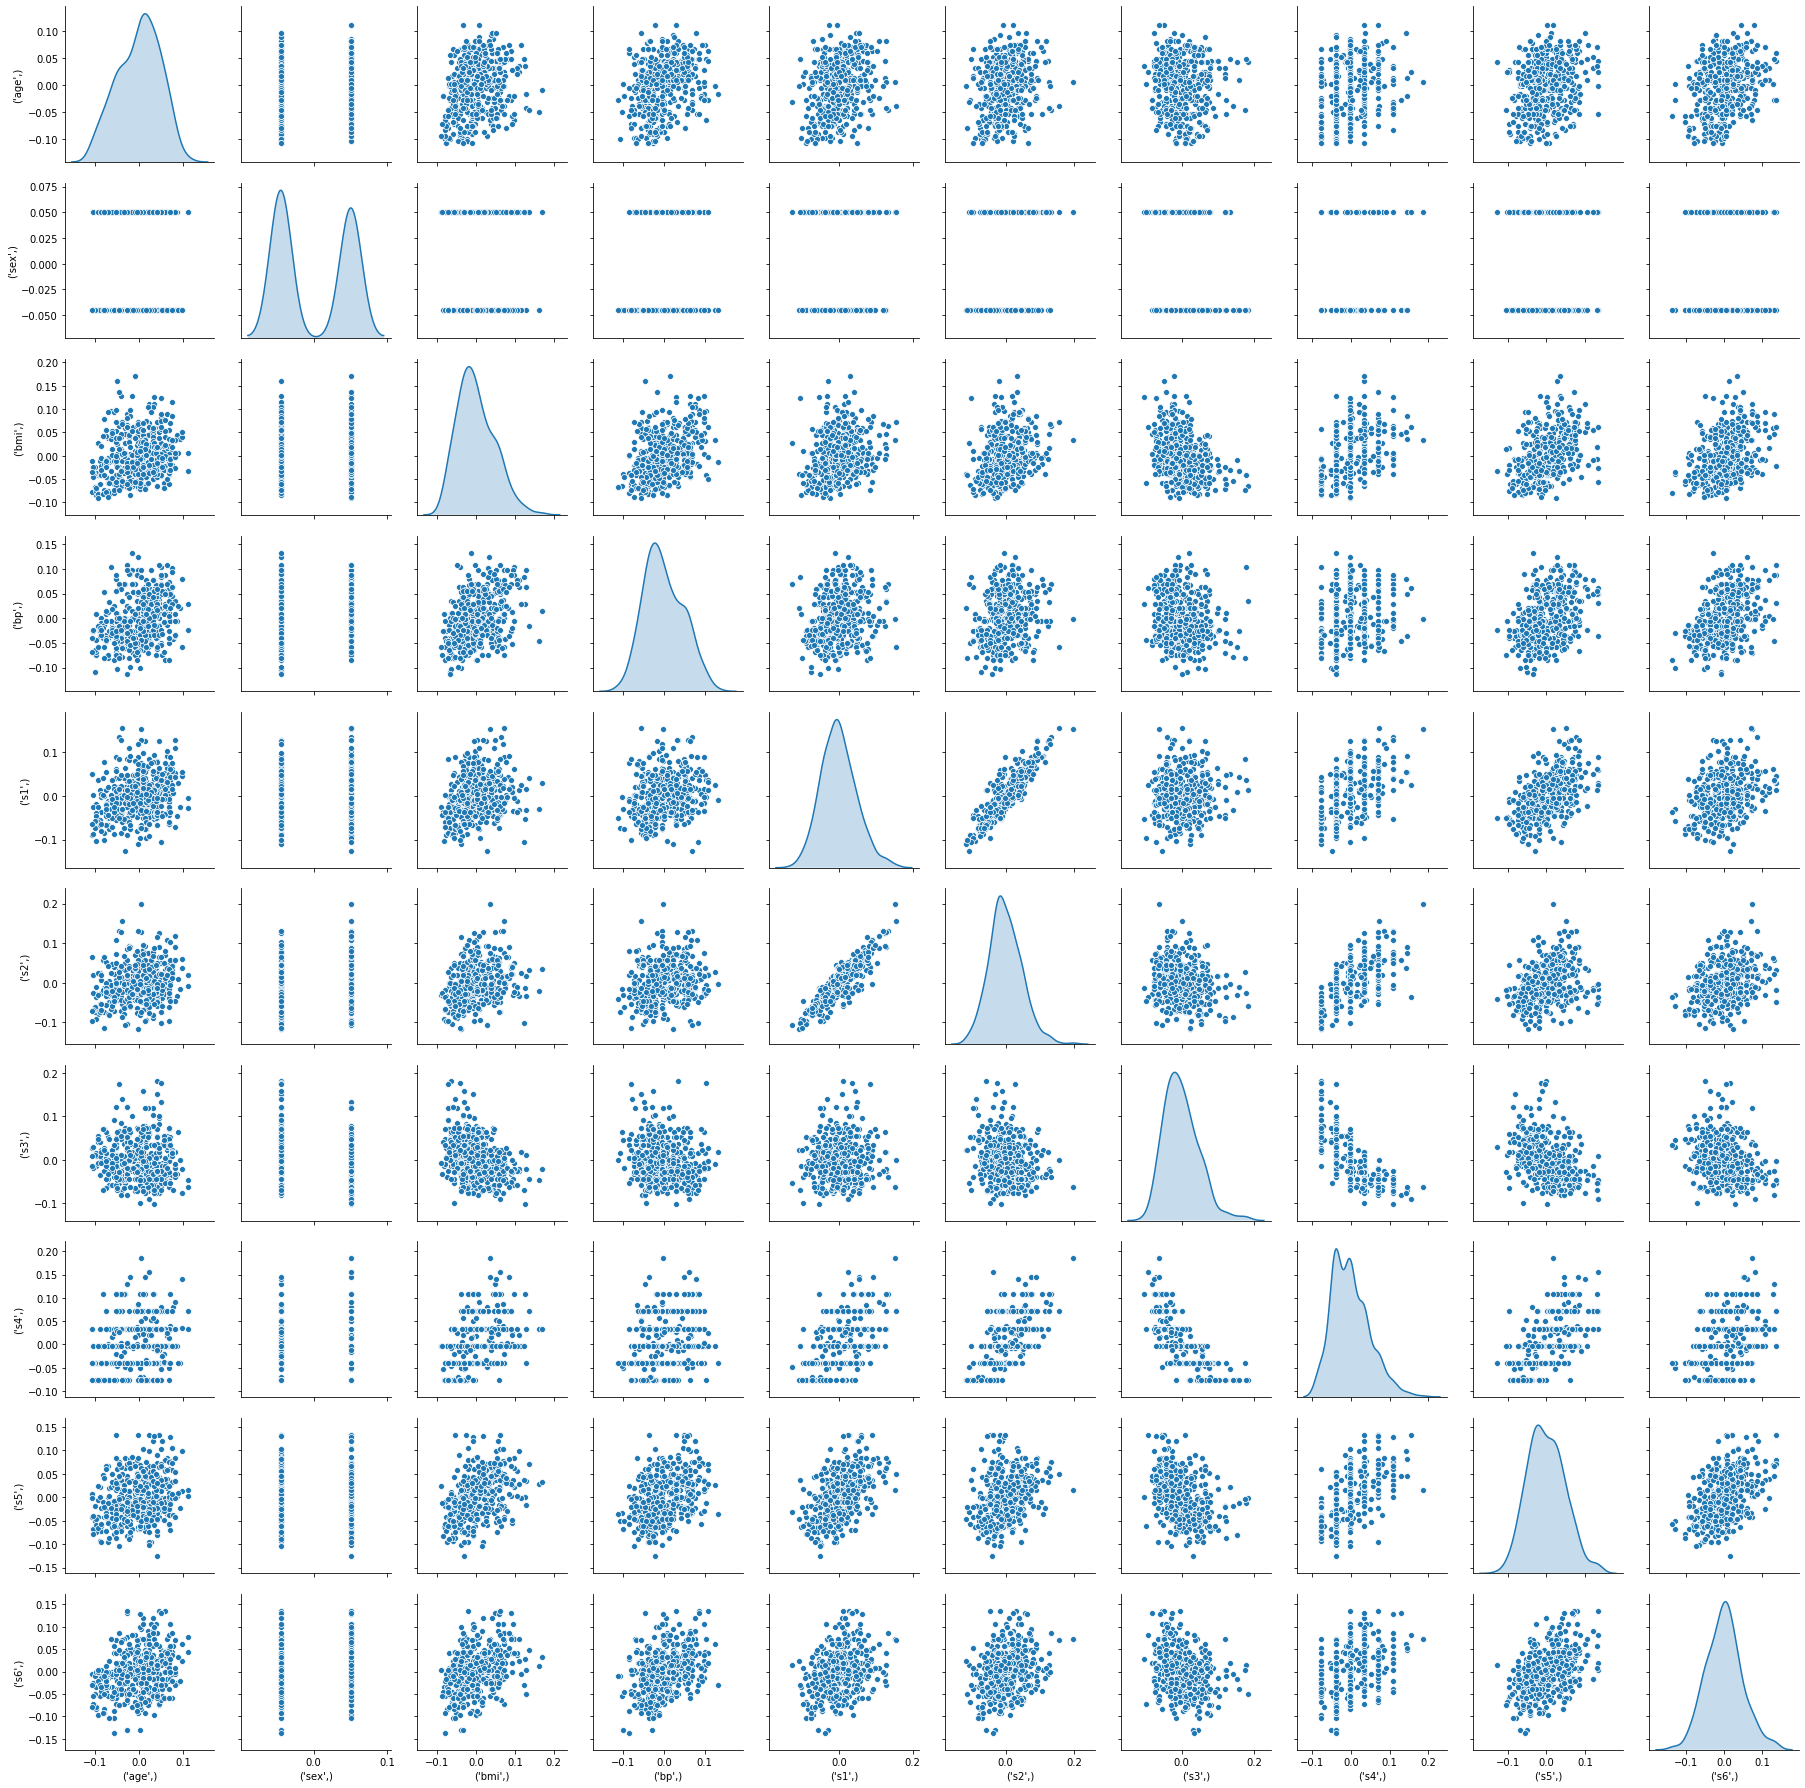

In [95]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(patiens_p, diag_kind="kde", palette="husl")

### Data standardisation with [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [96]:
# if necessary to scale data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(patients['data'])

### Data split into train and test batches with [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method

In [97]:
from sklearn.model_selection import train_test_split

patients_train_data, patients_test_data, patients_train_target, patients_test_target = \
train_test_split(patients['data'],patients['target'], test_size=0.1, random_state=10)
train_test_split(scaled_data, patients['target'], test_size=0.1)

[array([[ 0.72413034, -0.93853666, -0.15313242, ..., -0.83030083,
         -0.44977638,  0.15150833],
        [-0.26867637, -0.93853666, -0.49302793, ..., -0.05449919,
         -0.80855653, -0.80640259],
        [ 0.4950211 ,  1.06548848, -0.78760405, ..., -0.83030083,
         -0.64650716, -0.28390573],
        ...,
        [ 0.41865135, -0.93853666,  0.0961243 , ..., -0.83030083,
         -0.49709836, -0.98056821],
        [-0.11593688, -0.93853666,  1.18378996, ...,  0.79888262,
          1.06762018,  1.19650206],
        [-1.94881082,  1.06548848, -1.89792941, ..., -0.05449919,
          0.5056766 ,  0.06442552]]),
 array([[-0.9560041 , -0.93853666,  0.32272131, -1.56686198, -1.04545682,
         -0.36338473, -0.60284252, -0.05449919, -2.19414471, -1.59014789],
        [ 0.4950211 , -0.93853666,  0.41336012, -0.26398218,  1.76053515,
          0.81507419,  1.33220754, -0.05449919,  1.38858402,  1.02233644],
        [ 0.87686984,  1.06548848,  1.29708846, -0.84303987, -0.29333526,
 

In [98]:
print("Training dataset:")
print("patients_train_data:", patients_train_data.shape)
print("patients_train_target:", patients_train_target.shape)

Training dataset:
patients_train_data: (397, 10)
patients_train_target: (397,)


In [99]:
print("Testing dataset:")
print("patients_test_data:", patients_test_data.shape)
print("patients_test_target:", patients_test_target.shape)

Testing dataset:
patients_test_data: (45, 10)
patients_test_target: (45,)


## Learning
### Training [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model

In [100]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
print(type(linear_regression))
linear_regression.fit(patients_train_data, patients_train_target)

<class 'sklearn.linear_model.base.LinearRegression'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model evaluation 

In [101]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" % 
      mean_squared_error(patients_test_target, linear_regression.predict(patients_test_data)))

Mean squared error of a learned model: 2155.96


Determining [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) with [r2_score()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [102]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(patients_test_target, linear_regression.predict(patients_test_data)))

Variance score: 0.64


### Model evaluation with [cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

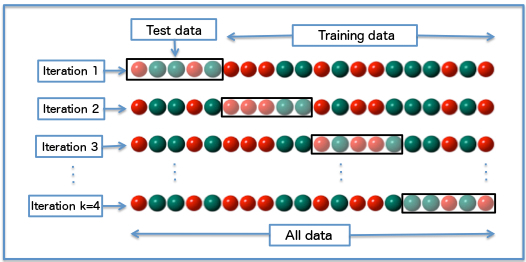

fig. cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics))

In [103]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), patients['data'], patients['target'], cv=4)
print(scores)

[0.37459088 0.49678359 0.50950086 0.55755847]


## Prediction

In [117]:
id=1
linear_regression_prediction = linear_regression.predict(patients_test_data[id,:].reshape(1,-1))

print(patients_test_data[id,:])
print(patients_test_data[id,:].reshape(1,-1))

[ 0.0090156  -0.04464164  0.04552903  0.0287581   0.01219057 -0.01383982
  0.02655027 -0.03949338  0.04613233  0.03620126]
[[ 0.0090156  -0.04464164  0.04552903  0.0287581   0.01219057 -0.01383982
   0.02655027 -0.03949338  0.04613233  0.03620126]]


In [105]:
print("Model predicted for patient {0} value {1}".format(id, linear_regression_prediction))

Model predicted for patient 1 value [209.91624155]


In [120]:
print("Real value for patient \"{0}\" is {1}".format(id, patients_test_target[id]))


Real value for patient "1" is 202.0


[149.35100539 209.91624155 187.12575388  79.16874771 162.07127868
 122.80679628 125.56908938 262.27477976  80.00579279  76.52866706
 124.60182964 141.61952247 165.10932356  96.3623371   46.26503807
 222.23056309 143.38167308 110.41208175 202.75049356  75.95754599
 190.23895721 243.51024723  73.62491037 212.75719947  53.38269079
 158.53939513 156.58521006 155.40175014 167.69550028 105.3070848
 275.05236897 179.16180097  61.05396461 156.89605421 219.34237194
 181.01699852  67.78039153 184.96304809 279.8800014  195.25705656
 201.77350888 145.11018447 216.56618149 122.36921779  77.72513395]
[200. 202.  67.  80. 151. 145.  65. 308.  42.  92. 150. 202. 184. 101.
  47. 237.  88. 152. 109.  89. 163. 274. 138. 275.  63. 154. 131.  91.
 128. 129. 243. 200.  72. 185. 296. 144.  75. 175. 281. 292. 292. 214.
 275.  92.  65.]


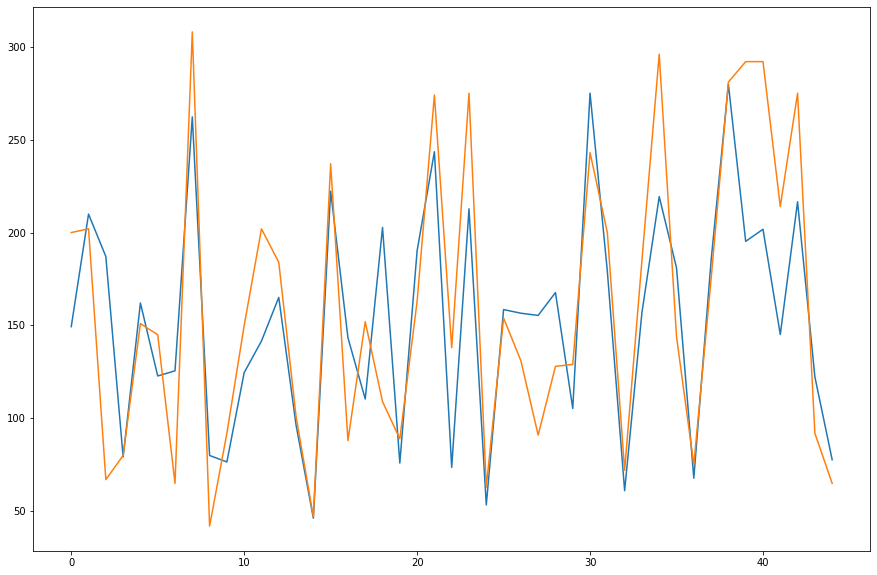

In [123]:
linear_regression_predictions = linear_regression.predict(patients_test_data)

print(linear_regression_predictions)
print(patients_test_target)

plt.figure(figsize=(15,10))

plt.plot(linear_regression_predictions)
plt.plot(patients_test_target)

In [70]:
print('Coefficients of a learned model: \n', linear_regression.coef_)

Coefficients of a learned model: 
 [ -16.39655572 -238.77867194  513.81314481  317.55517945 -778.94790083
  477.5802684    96.33602978  191.40705985  740.2641261    65.36624055]


### [Lasso regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) model. A Model with [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics))

In [71]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.3)
lasso_regression.fit(patients_train_data, patients_train_target)
score = lasso_regression.score(patients_test_data, patients_test_target) #r2 score
print("Lasso regression variance score: %.2f" % score)

Lasso regression variance score: 0.58


In [72]:
print('Coefficients of a learned model: \n', lasso_regression.coef_)

Coefficients of a learned model: 
 [   0.           -0.          494.9148608   175.20251127   -0.
   -0.         -122.37344218    0.          439.07002637    0.        ]


## Boston market price prediction

TODO: write python script to train linear regression model that learn price estimation on Boston market data. Check learned model with mean squared error and variance score (r2). Check predicted value for house with id=5 from test data. How this estimation differ from real value?
Evaluate linear model with cross validation.

Hint: check for data values and perform standardisation if necessary. 

In [73]:
from sklearn.datasets import load_boston
boston_market_data = load_boston()
#print(boston_market_data['DESCR'])

#print(patients.data[1,:])


In [81]:
from sklearn.datasets import load_boston
boston_market_data = load_boston()
#print(boston_market_data['DESCR'])
#print(boston_market_data.data[1,:])



import pandas as pd
boston_d = pd.DataFrame(boston_market_data.data, columns=[boston_market_data.feature_names])
#boston_d.head()

#boston_d.describe()

from sklearn.model_selection import train_test_split

boston_market_train_data, boston_market_test_data, \
boston_market_train_target, boston_market_test_target = \
train_test_split(boston_market_data['data'],boston_market_data['target'], test_size=0.1, random_state=10)
# train_test_split(scaled_data, patients['target'], test_size=0.1)

print("Training dataset:")
print("patients_train_data:", boston_market_train_data.shape)
print("patients_train_target:", boston_market_train_target.shape)
print("Testing dataset:")
print("patients_test_data:", boston_market_test_data.shape)
print("patients_test_target:", boston_market_test_target.shape)

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(boston_market_train_data, boston_market_train_target)
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" % 
      mean_squared_error(boston_market_test_target, linear_regression.predict(boston_market_test_data)))
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(boston_market_test_target, linear_regression.predict(boston_market_test_data)))


from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), boston_market_data['data'], boston_market_data['target'], cv=4)
print(scores)

id=5
linear_regression_prediction = linear_regression.predict(boston_market_test_data[id,:].reshape(1,-1))

#print(patients_test_data[id,:].shape)
#print(patients_test_data[id,:].reshape(1,-1).shape)

print("Model predicted for house {0} value {1}".format(id, linear_regression_prediction))
print("Real value for house \"{0}\" is {1}".format(id, boston_market_test_target[id]))

from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" % 
      mean_squared_error(boston_market_test_target, linear_regression.predict(boston_market_test_data)))

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(boston_market_test_target, linear_regression.predict(boston_market_test_data)))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), boston_market_data['data'], boston_market_data['target'], cv=4)
print(scores)


from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.3)
lasso_regression.fit(boston_market_train_data, boston_market_train_target)
score = lasso_regression.score(boston_market_test_data, boston_market_test_target) #r2 score
print("Lasso regression variance score: %.2f" % score)

print('Coefficients of a learned model: \n', lasso_regression.coef_)

plt.plot(lr_poly.predict(housig_test_poly))
plt.show()



Training dataset:
patients_train_data: (455, 13)
patients_train_target: (455,)
Testing dataset:
patients_test_data: (51, 13)
patients_test_target: (51,)
Mean squared error of a learned model: 27.96
Variance score: 0.72
[ 0.60217169  0.60398145  0.35873597 -1.10867706]
Model predicted for house 5 value [16.73451257]
Real value for house "5" is 14.3
Mean squared error of a learned model: 27.96
Variance score: 0.72
[ 0.60217169  0.60398145  0.35873597 -1.10867706]
Lasso regression variance score: 0.69
Coefficients of a learned model: 
 [-1.00015378e-01  5.79880947e-02 -2.32207959e-02  0.00000000e+00
 -0.00000000e+00  2.86856547e+00 -2.22327657e-03 -1.09977063e+00
  2.64225484e-01 -1.38236847e-02 -6.83612132e-01  1.14473159e-02
 -6.28070130e-01]


# References
__ALL images (unless otherwise stated) are from book__: Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015, ISBN 1783555130

If You are using Your own computer
install required packages: 
```conda install numpy pandas scikit-learn matplotlib seaborn```